# Assignment_3 SVM

In [154]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC


# Part 2: SVM

### Use the following function to plot the classification regions

In [155]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [156]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

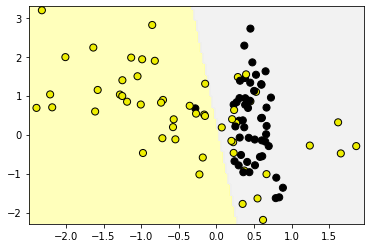

In [158]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear')

lin_clf.fit(X_train, y_train)
plot_class_regions_for_classifier(lin_clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

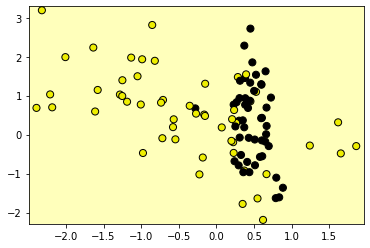

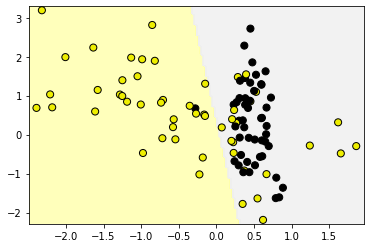

In [159]:
clf_littleC =svm.SVC(C=0.00001,kernel='linear')
clf_bigC    =svm.SVC(C=100,kernel='linear')
clf_littleC.fit(X_train, y_train)
clf_bigC.fit(X_train, y_train)
plot_class_regions_for_classifier(clf_littleC, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)
plot_class_regions_for_classifier(clf_bigC, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)


no boundries when C was small

### Use the fruits dataset in questions 4, 5, 6.

In [160]:
import pandas as pd
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [161]:
y_fruits=fruits['fruit_label']
X_fruits=fruits.drop('fruit_label',axis = 1) 

X_fruits=X_fruits.loc[:, ['height','width']]
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, test_size=0.25, random_state=0)
lin_clf = SVC(kernel = 'linear')
lin_clf.fit(X_train, y_train)



SVC(kernel='linear')

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

## answer
4 models , because we have 4 classes 

In [162]:
print('w = ',lin_clf.coef_)
print('b = ',lin_clf.intercept_)

w =  [[ 0.74999906  0.24999969]
 [-1.0247669   0.17846357]
 [-1.10094816  1.55993033]
 [-0.73131977 -0.31796512]
 [-0.71065935  0.05076138]
 [-1.13258578  1.89213469]]
b =  [-6.07499311  7.02661228 -2.10267889  6.40858653  4.02537775 -3.82649862]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


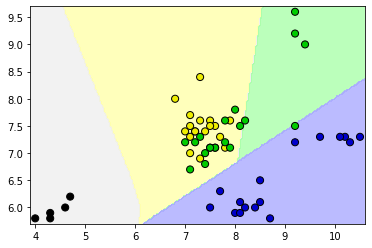

In [163]:
plot_class_regions_for_classifier(lin_clf,X_fruits.to_numpy(), y_fruits.to_numpy(), X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [164]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [165]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}

from sklearn.model_selection import GridSearchCV

lin_clf = SVC()
tuning_model=GridSearchCV(lin_clf,parameters)
tuning_model.fit(X_train, y_train)
print(tuning_model.best_params_)


{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [166]:
tuned_hyper_model= SVC(C=10,kernel='rbf')
tuned_hyper_model.fit(X_train,y_train)
print(tuned_hyper_model.score(X_test,y_test))
print(tuned_hyper_model.score(X_train,y_train))

0.9370629370629371
0.9154929577464789


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [167]:
import pandas as pd
import numpy as np

#for PCA (feature engineering)
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC


df = load_breast_cancer(as_frame=True)
df=df.frame
X = df.iloc[:,0:30]
y = df.target


#reducing the attributes in X dataframe

#1 scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se 
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)

#3 apply PCA on scaled data
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled_drop)
x_pca = pd.DataFrame(x_pca)
print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']

#target data
diag = df.iloc[:,1:2]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)
X=(Xy.iloc[:,0:11]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
svc = SVC(C=10,kernel='rbf')
svc.fit(X_train, y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

Before PCA, X dataframe shape =  (569, 30) 
After PCA, x_pca dataframe shape =  (569, 11)
0.9859154929577465
0.986013986013986
